In [14]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

# Steps in the pipeline for natural language processing 
  1. Acquiring and loading the data
  2. Cleaning the dataset
  3. Removing extra symbols 
  4. Removing punctuations
  5. Removing the stopwords
  6. Tokenization
  7. Pickle file

In [15]:
# load datasets
FAKE_NEWS = pd.read_csv('data/Fake.csv')
REAL_NEWS = pd.read_csv('data/True.csv')

In [16]:
FAKE_NEWS.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [17]:
REAL_NEWS.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [18]:
REAL_NEWS.shape, FAKE_NEWS.shape

((21417, 4), (23481, 4))

In [19]:
# Since there are no labels in the two sets of data, we can create labels to distinguish if the news
# is fake or not.
REAL_NEWS['label'] = 1
FAKE_NEWS['label'] = 0

In [20]:
#drop unnecessary columns
real = REAL_NEWS.drop(['title', 'subject', 'date'], axis=1)
fake = FAKE_NEWS.drop(['title', 'subject', 'date'], axis=1)

In [21]:
# concatenate the datasets
data = pd.concat([real, fake], axis=0)

<AxesSubplot:>

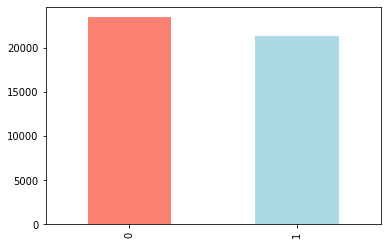

In [22]:
# Check if the labels are balanced
data.label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

#### Labels are quite balanced. Proceed.

### **NLP**

In [23]:
# Remove urls
text = re.sub(r'^https?:\/\/.*[\r\n]*', '', str(data['text']), flags=re.MULTILINE)

# Remove user @ references and ‘#’ from text
text = re.sub(r'\@\w+|\#',"", text)

In [24]:
# remove punctuations
text = text.translate(str.maketrans("","", string.punctuation))

In [25]:
stop_words = set(stopwords.words('english'))

# word tokenization
tokens = word_tokenize(text)
words = [w for w in tokens if not w in stop_words]

In [26]:
# convert the tokens into meaningful numbers with TF-IDF.
# Use the TF-IDF method to extract and build the features for 
# our machine learning pipeline.
tf_vector = TfidfVectorizer(sublinear_tf=True)
tf_vector.fit(data['text'])

TfidfVectorizer(sublinear_tf=True)

<hr />

### **ML PIPELINE**

In [27]:
# separate the label from the other features and transform it
X_text = tf_vector.transform(data['text'].ravel())
y_values = np.array(data['label'].ravel())

In [28]:
# encode ...
le = preprocessing.LabelEncoder()
le.fit(y_values)
le.transform(y_values)

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
# split data with sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, y_values, 
test_size=0.2, random_state=120)

In [30]:
# use the logistic regression to train the model
log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# make prediction with the test data
y_predict = log_model.predict(X_test)

In [32]:
# model evaluation (LR)
print('Accuracy score: ', round(accuracy_score(y_test, y_predict) *100), '%')
print('--------------------------------------- \n')
print(classification_report(y_test, y_predict))
print('--------------------------------------- \n')
print('Confusion matrix: \n',confusion_matrix(y_test, y_predict))

Accuracy score:  99 %
--------------------------------------- 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4699
           1       0.99      0.99      0.99      4281

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

--------------------------------------- 

Confusion matrix: 
 [[4650   49]
 [  46 4235]]


In [33]:
# use MNB to train the model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
# model evaluation (MNB)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred) *100), '%')
print('--------------------------------------- \n')
print(classification_report(y_test, y_pred))
print('--------------------------------------- \n')
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

Accuracy score:  95 %
--------------------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4699
           1       0.95      0.94      0.94      4281

    accuracy                           0.95      8980
   macro avg       0.95      0.94      0.95      8980
weighted avg       0.95      0.95      0.95      8980

--------------------------------------- 

Confusion matrix: 
 [[4472  227]
 [ 265 4016]]
